## Home work 6

In [2]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from typing import Tuple
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from mlflow.models import infer_signature
import mlflow

In [3]:
import pickle


### Loading Kedro Extension

In this section, we load the Kedro extension for IPython. Kedro is a development workflow framework that helps in creating reproducible, maintainable, and modular data science code. By loading this extension, we can leverage Kedro's capabilities within our Jupyter Notebook environment.



In [4]:
%load_ext kedro.ipython


[10/25/24 18:19:03] INFO     Using                                                                  ]8;id=747651;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=429252;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framework\project\__init__.py#249\249]8;;\
                             'c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framewor                
                             k\project\rich_logging.yml' as logging configuration.                                 

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=369326;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=101909;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=787776;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=733319;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=957998;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=491890;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#175\175]8;;\
                             c:\Users\Admin\Desktop\AI-839\srinivasan-ai-839.                                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/25/24 18:19:06] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=187172;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=33043;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#62\62]8;;\

                    WARNING  No 'mlflow.yml' config file found in environment. Default            ]8;id=385363;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=968196;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#75\75]8;;\
                             configuration will be used. Use ``kedro mlflow init`` command in CLI                  
                             to customize the configuration.                                                       

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=303702;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=924948;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Admin/Desktop/AI-839/srinivasan-ai-839/ml                           
                             runs'                                                                                 

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=930296;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=937548;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/25/24 18:19:07] INFO     Kedro project Srinivasan-ai-839                                        ]8;id=177586;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=578185;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=748891;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=970074;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[10/25/24 18:19:08] INFO     Registered line magic 'run_viz'                                        ]8;id=125263;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=312158;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

### Using Kedro Catalog

After loading the Kedro extension with `%load_ext kedro.ipython`, you can interact with the Kedro catalog directly in your Jupyter Notebook. The `catalog` object provides access to the data and model artifacts defined in your Kedro project.

For example, calling `catalog` will display a list of all available datasets and models that you can load and use in your notebook. This is useful for quickly inspecting what resources are available in your Kedro pipeline.

To load a specific dataset or model, you can use the `catalog.load("name_of_dataset_or_model")` method. This allows you to seamlessly integrate Kedro's data management capabilities into your interactive data science workflow.

In [5]:
catalog


{'dataset_id_214': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/Admin/Desktop/AI-839/srinivasan-ai-839/data/01_raw/dataset_id_214.csv'), "
                   "protocol='file', load_args={}, save_args={'index': False})",
 'inference_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/Admin/Desktop/AI-839/srinivasan-ai-839/data/01_raw/sampled_file.csv'), "
                   "protocol='file', load_args={}, save_args={'index': False})",
 'encoder': "kedro_datasets.pickle.pickle_dataset.PickleDataset(filepath=PurePosixPath('C:/Users/Admin/Desktop/AI-839/srinivasan-ai-839/data/03_primary/encoder.pkl'), "
            "backend='pickle', protocol='file', load_args={}, save_args={})",
 'preprocessed_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/Admin/Desktop/AI-839/srinivasan-ai-839/data/02_modelinput/preprocessed_data.csv'), "
                      "protocol='file', load_args={}, save_a

In [6]:
def preprocess_data(df: pd.DataFrame,encoder:OneHotEncoder) -> Tuple[pd.DataFrame]:
    """
    Preprocesses the input DataFrame by converting categorical columns into one-hot encoded columns
    using sklearn's OneHotEncoder. The numerical columns are retained and concatenated with the
    encoded categorical columns.

    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame containing both categorical and numerical columns.
    encoder: OneHotEncoder
        The one hot encoder that has been stored in the configuration
    Returns:
    --------
    Tuple[pd.DataFrame, OneHotEncoder]
        - A DataFrame with categorical columns one-hot encoded and numerical columns retained.
        # - The fitted OneHotEncoder instance.
    """
    # Identify numeric and categorical columns
    num_cols = df._get_numeric_data()
    cat_cols = df.select_dtypes(include=['object'])
    
    if not cat_cols.empty:
        # Initialize and fit the OneHotEncoder on categorical columns
        # encoder = OneHotEncoder(sparse_output=False, dtype='float', drop=None)
        cat_cols_ohe = encoder.fit_transform(cat_cols)
        
        # Convert the encoded columns into a DataFrame
        cat_cols_ohe_df = pd.DataFrame(
            cat_cols_ohe, columns=encoder.get_feature_names_out(cat_cols.columns)
        )
        
        # Concatenate the one-hot encoded categorical columns with the numeric columns
        df_processed = pd.concat([cat_cols_ohe_df, num_cols.reset_index(drop=True)], axis=1)
    else:
        df_processed = df
        encoder = None

    # Save the processed DataFrame to a CSV file
    # df_processed.to_csv("C:\\Users\\Admin\\Desktop\\AI-839\\srinivasan-ai-839\\data\\01_raw\\pre_processed.csv", index=False)
    
    return df_processed

### Encoder

Retrieving the encoder stored in the catalog as a pickle file.


In [7]:
encoder = catalog.load("encoder")

[10/25/24 18:19:20] INFO     Loading data from encoder (PickleDataset)...                       ]8;id=372120;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=857247;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [8]:
dataset = catalog.load("preprocessed_data")

[10/25/24 18:19:23] INFO     Loading data from preprocessed_data (CSVDataset)...                ]8;id=171018;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=601778;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

loading the model for the same.

In [9]:
model = catalog.load("model2")

[10/25/24 18:19:25] INFO     Loading data from model2 (PickleDataset)...                        ]8;id=856620;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=354482;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [19]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [10]:
dataset_new = preprocess_data(dataset,encoder)

removing the first ten rows from the dataset.


In [11]:
# dataset_truncate = dataset_new[10:]
dataset_truncate = dataset_new

In [12]:
dataset_truncate.drop(columns=["Unnamed: 0"],inplace=True)
dataset_truncate


,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.048244,0.355725,0.909741,0.405124,0.260767,0.103618,0.406376,0.017897,0.518682,True
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.848429,0.167300,0.525345,0.701071,0.032609,0.347617,0.805072,0.734602,0.665720,False
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135713,0.185599,0.992303,0.778875,0.236489,0.317112,0.751187,0.080140,0.272325,True
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.595960,0.138928,0.515338,0.198236,0.515988,0.190489,0.459742,0.018711,0.512552,False
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.828696,0.991522,0.519209,0.068189,0.121944,0.326375,0.774543,0.898108,0.173491,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.882218,0.883794,0.233441,0.150932,0.499922,0.434244,0.140232,0.187078,0.141813,False
96,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.149197,0.043498,0.134882,0.350446,0.889813,0.760545,0.261638,0.823732,0.053394,True
97,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.424718,0.253165,0.242619,0.903971,0.694778,0.517654,0.707042,0.575040,0.073795,False
98,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.469677,0.654652,0.316479,0.831883,0.405854,0.259628,0.350143,0.868693,0.065413,True


In [15]:
X = dataset_truncate.drop(columns=["y"])

In [16]:
Y = dataset_truncate['y']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

training the model again.

In [34]:
# model = RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

running the inference with the new model.

In [18]:
Y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display metrics
metrics = f"""
| Metric              | Value |
|---------------------|-------|
| **Accuracy**        | {accuracy:.2f}  |
| **Precision**       | {precision:.2f}  |
| **Recall**          | {recall:.2f}  |
| **F1-Score**        | {f1:.2f}  |
| **ROC AUC**         | {roc_auc:.2f}  |

### Confusion Matrix
|                | Predicted Low Risk | Predicted High Risk |
|----------------|--------------------|----------------------|
| **True Low**   | {conf_matrix[0, 0]}                | {conf_matrix[0, 1]}                   |
| **True High**  | {conf_matrix[1, 0]}                 | {conf_matrix[1, 1]}                  |
"""

print(metrics)


| Metric              | Value |
|---------------------|-------|
| **Accuracy**        | 0.95  |
| **Precision**       | 0.92  |
| **Recall**          | 1.00  |
| **F1-Score**        | 0.96  |
| **ROC AUC**         | 0.94  |

### Confusion Matrix
|                | Predicted Low Risk | Predicted High Risk |
|----------------|--------------------|----------------------|
| **True Low**   | 7                | 1                   |
| **True High**  | 0                 | 12                  |



In [14]:
desc = dataset_truncate.describe()
desc_md = desc.to_markdown()
print(desc_md)


|       |   checking_status_0<=X<200 |   checking_status_<0 |   checking_status_>=200 |   checking_status_no checking |   credit_history_all paid |   credit_history_critical/other existing credit |   credit_history_delayed previously |   credit_history_existing paid |   credit_history_no credits/all paid |   purpose_business |   purpose_domestic appliance |   purpose_education |   purpose_furniture/equipment |   purpose_new car |   purpose_other |   purpose_radio/tv |   purpose_repairs |   purpose_retraining |   purpose_used car |   savings_status_100<=X<500 |   savings_status_500<=X<1000 |   savings_status_<100 |   savings_status_>=1000 |   savings_status_no known savings |   employment_1<=X<4 |   employment_4<=X<7 |   employment_<1 |   employment_>=7 |   employment_unemployed |   personal_status_female div/dep/mar |   personal_status_male div/sep |   personal_status_male mar/wid |   personal_status_male single |   other_parties_co applicant |   other_parties_guarantor |   other_parti

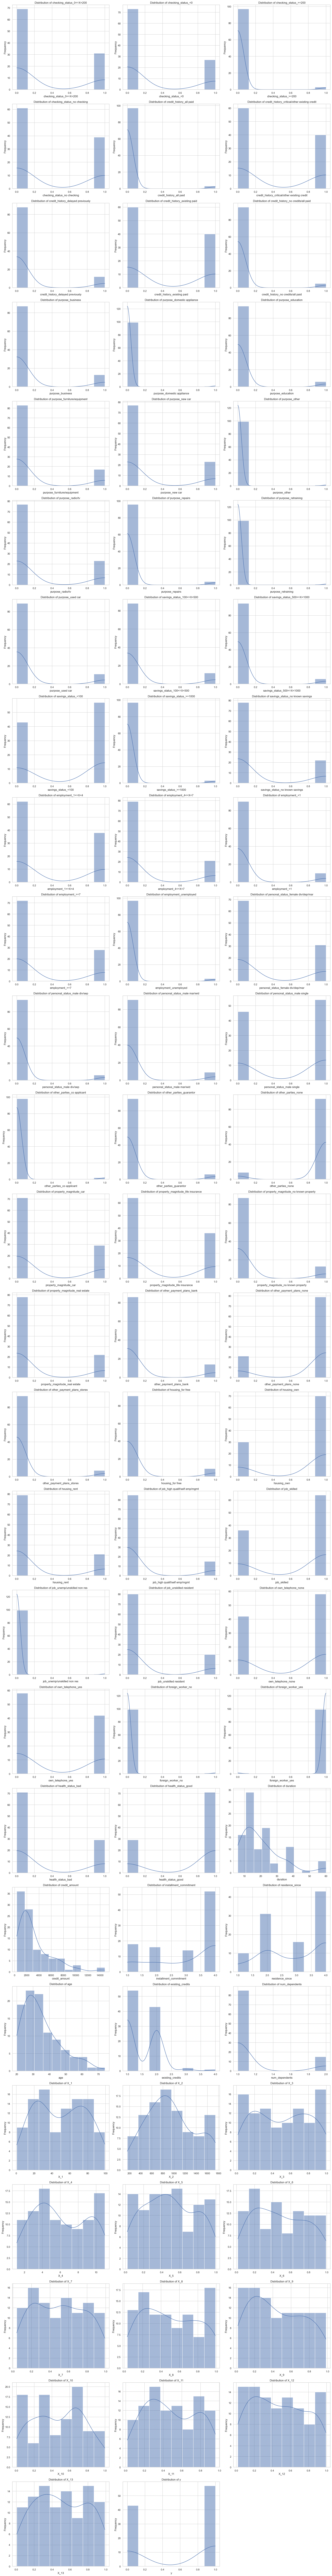

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=len(dataset.columns)//3 + 1, ncols=3, figsize=(20, len(dataset.columns)*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each column
for i, col in enumerate(dataset.columns):
    sns.histplot(dataset[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
# import pickle
# with open("model_new.pkl", "wb") as f: 
#     pickle.dump(model, f)